In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

In [2]:
df = pd.DataFrame(pd.read_csv('HTRU_2.csv'))
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Label
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [3]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(df.drop(['Label'], axis = 1), df['Label'], test_size=0.25, random_state=0)

In [4]:
RFC = ensemble.RandomForestClassifier(n_estimators=1000)
RFC.fit(xtrain, ytrain)
ypredic = RFC.predict(xtest)

In [5]:
print('Precision =', metrics.precision_score(ytest, ypredic))
print('Accuracy =', metrics.accuracy_score(ytest, ypredic))
print('Recall =', metrics.recall_score(ytest, ypredic))

Precision = 0.937888198757764
Accuracy = 0.9825698324022346
Recall = 0.8388888888888889


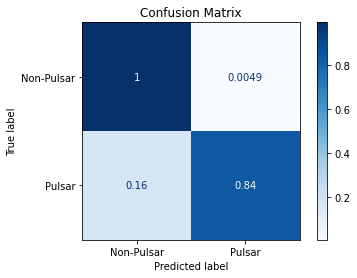

In [8]:
metrics.plot_confusion_matrix(RFC, xtest, ytest, normalize='true', cmap='Blues', display_labels=['Non-Pulsar', 'Pulsar'])
plt.title('Confusion Matrix')
plt.show()